In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from volume_calculator import *
%load_ext autoreload
%autoreload 2

In [2]:
# Maximum liklehood test parameters
delta=1
min_size=0.01

In [3]:
fn = r"C:\Projects\bioreactor_volume\data\meassurements.xlsx"
online_df = pd.read_excel(fn, sheet_name='online', engine='openpyxl')
offline_df = pd.read_excel(fn, sheet_name='offline', engine='openpyxl')

In [6]:
time = np.array(online_df['time_h'])

In [7]:
offline_samples = np.array(offline_df)

In [8]:
addition_data = np.array(online_df.drop(columns=['time_h']))
addition_data.shape

(17146, 5)

In [9]:
addition_idx = apply_detect_step_changes_to_multiplte_streams(addition_data, delta, min_size)

In [10]:
addition_idx[0]

array([860], dtype=int64)

In [11]:
material_addition_matrix = calculate_additions_from_multiple_streams(time, addition_data, addition_idx)

In [12]:
combined_data = combine_online_and_offline_data(material_addition_matrix, offline_samples)

In [13]:
sorted_material_addition_matrix = sort_time_data(combined_data)

In [14]:
sampling_intervals = calculate_sampling_intervals(time)

In [15]:
working_volume, test_arr = calculate_volume(time, sampling_intervals, sorted_material_addition_matrix, initial_volume=1500)

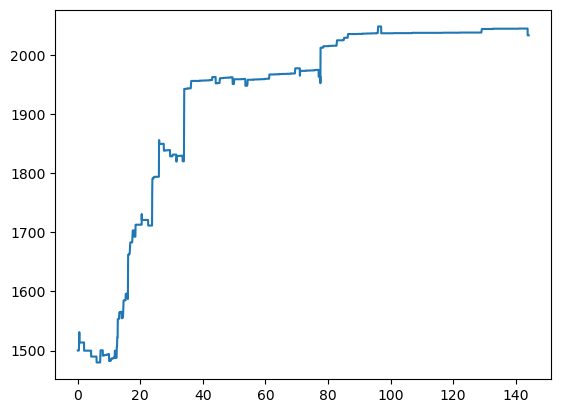

In [16]:
plt.plot(time, working_volume)
plt.show()